## Loading Data




In [1]:
!pip install datasets
from datasets import load_dataset
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
emotion_dataset = load_dataset("emotion");

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [2]:
emotion_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [3]:
emotion_train = emotion_dataset['train']
print(emotion_train[0])
print(emotion_train.column_names)
print(emotion_train.features)

{'text': 'i didnt feel humiliated', 'label': 0}
['text', 'label']
{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


In [4]:
import pandas as pd
emotion_dataset.set_format(type="pandas")
train = emotion_dataset["train"][:]
test = emotion_dataset["test"][:]
val = emotion_dataset["validation"][:]
print(train)
print(train.shape)

                                                    text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]
(16000, 2)


## Using Training Data


**Preprocessing data with CountVectorizer** - on train['text']

In [5]:
# preprocessing with Count Vectorizer, uses non-binary approach
print("PreProcessing: Extracting the text without the label--------------")
corpus = train['text']
print(train['text'])

print("PreProcessing: Turned into numpy data type------------------------") #for handling purposes
corpus = corpus.values # now numpy data type
print(type(corpus))
print(corpus.shape)
print(corpus)

print("\nBoW: Building the Vocabulary (Fits)----------------------------------")
vectorizer = CountVectorizer(analyzer= 'word', lowercase = True) # sets lowercase
text_train = vectorizer.fit(corpus)  # builds the vocabulary
print(vectorizer.get_feature_names_out()) # prints vocabulary

print("\nBoW: Transforms corpus to a certain representation---------------")
text_train = vectorizer.transform(corpus) # converts/transforms to a certain reprsentation, too big to completely view
print(text_train.toarray())

PreProcessing: Extracting the text without the label--------------
0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object
PreProcessing: Turned into numpy data type------------------------
<class 'numpy.ndarray'>
(16000,)
['i didnt feel humiliated'
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'
 'im

**Preprocessing dat** - train['label']

> Indented block



In [6]:
#Turning labels into numpy type, but removed LabelEncoder bcz numbers --> numerical representations?? no.
from sklearn.preprocessing import LabelEncoder
print("PreProcessing: Extracting the LABEL without the TEXT--------------")
label_train = train['label']
print(label_train)

print("\nPreProcessing: Turned into numpy data type------------------------")
label_train = label_train.values # now numpy data type, for better handling of data
print(type(label_train))
print(label_train.shape)
print(label_train)

PreProcessing: Extracting the LABEL without the TEXT--------------
0        0
1        0
2        3
3        2
4        3
        ..
15995    0
15996    0
15997    1
15998    3
15999    0
Name: label, Length: 16000, dtype: int64

PreProcessing: Turned into numpy data type------------------------
<class 'numpy.ndarray'>
(16000,)
[0 0 3 ... 1 3 0]


## Using Validation Data

**Preprocessing data withOUT CountVectorizor** - with val['text']

In [7]:
# import statements and just turning val[text] into numpy. NO making new vocabulary!!
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.sparse import csr_matrix

print("PreProcessing: Validation --------------")
text_val = val['text']
print(text_val)

print("PreProcessing: Turned into numpy data type------------------------")
text_val = text_val.values # now numpy data type
print(type(text_val))
print(text_val.shape)
print(text_val)

#ask if this line is correct??
text_val = vectorizer.transform(text_val)
#print(text_val)

PreProcessing: Validation --------------
0       im feeling quite sad and sorry for myself but ...
1       i feel like i am still looking at a blank canv...
2                          i feel like a faithful servant
3                       i am just feeling cranky and blue
4       i can have for a treat or if i am feeling festive
                              ...                        
1995    im having ssa examination tomorrow in the morn...
1996    i constantly worry about their fight against n...
1997    i feel its important to share this info for th...
1998    i truly feel that if you are passionate enough...
1999    i feel like i just wanna buy any cute make up ...
Name: text, Length: 2000, dtype: object
PreProcessing: Turned into numpy data type------------------------
<class 'numpy.ndarray'>
(2000,)
['im feeling quite sad and sorry for myself but ill snap out of it soon'
 'i feel like i am still looking at a blank canvas blank pieces of paper'
 'i feel like a faithful servant' .

**Preprocessing data** - val['label']

In [8]:
# took away label encoder bcz numbers --> numbers doesn't make sense. Is numpy type now
print("PreProcessing: Extracting the LABEL without the TEXT--------------")
label_val = val['label']
print(label_val)

print("\nPreProcessing: Turned into numpy data type------------------------")
label_val = label_val.values # now numpy data type
print("label_val.shape ---> ", label_val.shape)
print("type(label_val) ---> ", type(label_val))
print(label_val)

PreProcessing: Extracting the LABEL without the TEXT--------------
0       0
1       0
2       2
3       3
4       1
       ..
1995    0
1996    1
1997    1
1998    1
1999    1
Name: label, Length: 2000, dtype: int64

PreProcessing: Turned into numpy data type------------------------
label_val.shape --->  (2000,)
type(label_val) --->  <class 'numpy.ndarray'>
[0 0 2 ... 1 1 1]


##SVM and Metrics

**SVM** - Validation

In [9]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# fitting training data
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(text_train, label_train) #inputs, outputs

# predict the labels on validation
predictions_SVM = SVM.predict(text_val)

In [10]:
#printing scores...
# Use accuracy_score function to get the accuracy (from article) ask if needed!!
print("SVM Accuracy Score -> ", accuracy_score(label_val, predictions_SVM)*100)

# Use metrics from sklearn function to get the accuracy (from article)
# metrics.name_score(ground truth, predicted)
print("SVM Confusion Matrix Score >>> \n", metrics.confusion_matrix(label_val, predictions_SVM))
print("SVM Accuracy Score >>> ", metrics.accuracy_score(label_val, predictions_SVM))
print("SVM Precision Score >>> ", metrics.precision_score(label_val, predictions_SVM, average= 'macro'))
print("SVM Recall Matrix Score >>> ", metrics.recall_score(label_val, predictions_SVM, average= 'macro'))
print("SVM F1-Score Matrix Score >>> ", metrics.f1_score(label_val, predictions_SVM, average= 'macro')) # in between p and r, good.

# Can I use this?
print("\nSVM Classification Report >>> \n", classification_report(label_val, predictions_SVM))

SVM Accuracy Score ->  88.44999999999999
SVM Confusion Matrix Score >>> 
 [[505  13   5  11  14   2]
 [ 22 644  23   6   7   2]
 [  3  30 144   0   1   0]
 [ 15  11   1 239   8   1]
 [ 12  11   0   5 174  10]
 [  4   7   0   0   7  63]]
SVM Accuracy Score >>>  0.8845
SVM Precision Score >>>  0.8633392009689936
SVM Recall Matrix Score >>>  0.8515944522248847
SVM F1-Score Matrix Score >>>  0.857264148925108

SVM Classification Report >>> 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       550
           1       0.90      0.91      0.91       704
           2       0.83      0.81      0.82       178
           3       0.92      0.87      0.89       275
           4       0.82      0.82      0.82       212
           5       0.81      0.78      0.79        81

    accuracy                           0.88      2000
   macro avg       0.86      0.85      0.86      2000
weighted avg       0.88      0.88      0.88      2000



#Looking at Data from Articles


In [11]:
import numpy as np
import pandas as pd
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8

labels_dict = {0:'sadness', 1:'joy', 2:'love', 3:'anger', 4:'fear', 5:'surprise'}
train['description'] = train['label'].map(labels_dict )
train.head()

,text,label,description
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [12]:
train['description'].value_counts(normalize=True)

,proportion
description,
joy,0.335125
sadness,0.291625
anger,0.134937
fear,0.121063
love,0.081500
surprise,0.035750


<Axes: xlabel='count', ylabel='description'>

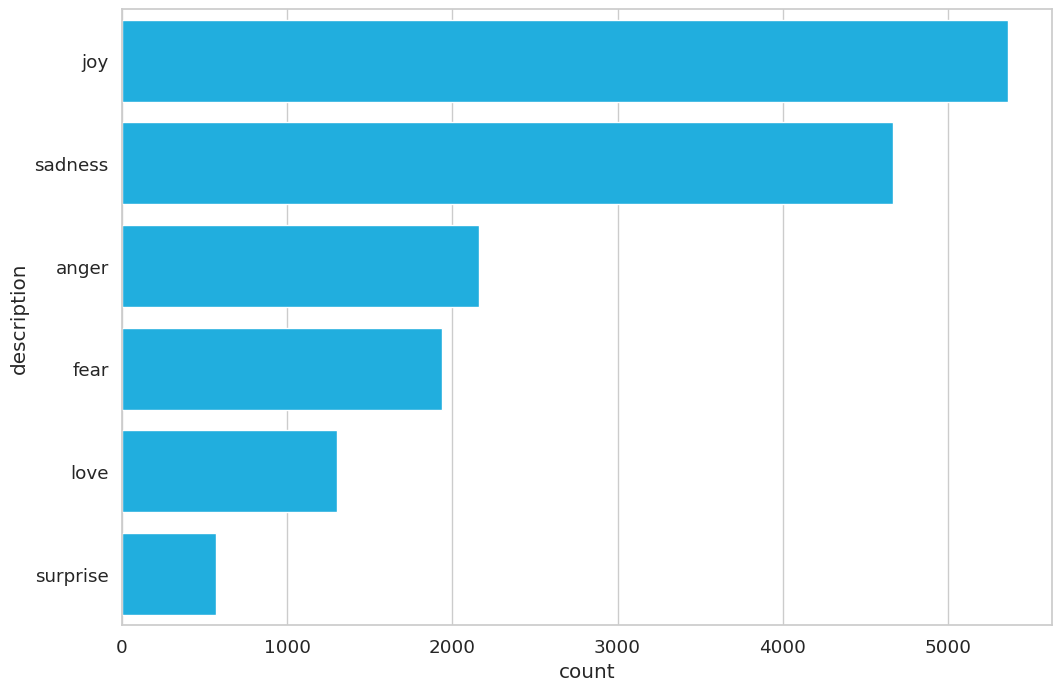

In [13]:
sns.countplot(train['description'],order = train['description'].value_counts(normalize=True).index)